# **Lineare Regression**

Dieses Notebook behandelt die lineare Regression mithilfe von Python Code-Snippets:

1. Was bedeutet „lineare Regression“?
2. Wie kann der Computer eine **gerade Linie** finden, die Daten gut beschreibt?
3. Wie sieht das mit einer **interaktiven Grafik** aus (mit Schiebereglern)?
4. Wie kann man sich den **Fehler zwischen Punkten und Gerade** vorstellen?
5. Aufgaben


In [1]:
# Bibliotheken laden
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# In einem Jupyter-/Colab-Notebook sorgt das dafür,
# dass die Grafiken direkt unter der Zelle angezeigt werden.
%matplotlib inline

## 1. Künstliche Beispieldaten erzeugen

An einer Schule wurden die Schüler:innen nach einer Prüfung befragt, wie lange jeweils für die Prüfungsvorbereitung gelernt wurde (In Stunden).

Annahme: **Je mehr man lernt, desto besser wird die Note** – also ein ungefähr **linearer Zusammenhang**.

Nachfolgend der Beispiel-Code wie man zufällige Datenpunkte generieren kann.


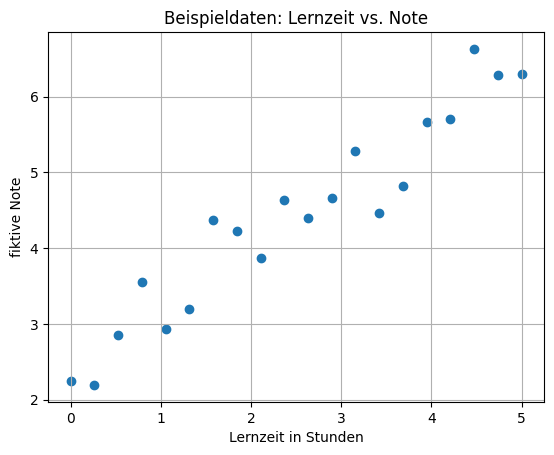

In [2]:
# Zufällige, aber reproduzierbare Daten erzeugen
np.random.seed(42)

# "Lernzeit" in Stunden (Feature X)
X = np.linspace(0, 5, 20)  # 20 Werte von 0 bis 5 Stunden

# "Noten" als Zielvariable y
# Wir nehmen an: Note ≈ 1.0 * Lernzeit + 2.0 + etwas Zufallsrauschen
true_slope = 1.0   # echte (versteckte) Steigung
true_intercept = 2.0  # echter (versteckter) Achsenabschnitt

noise = np.random.normal(0, 0.5, size=X.shape)  # zufälliges Rauschen
y = true_slope * X + true_intercept + noise

# Daten darstellen
plt.scatter(X, y)
plt.xlabel("Lernzeit in Stunden")
plt.ylabel("fiktive Note")
plt.title("Beispieldaten: Lernzeit vs. Note")
plt.grid(True)
plt.show()

## 2️. Idee der linearen Regression

Wir wollen eine **Gerade** finden, die die Punkte **möglichst gut beschreibt**.

Die allgemeine Form einer Geraden ist:

> **y = m · x + b**  

- **m** ist die **Steigung** (wie stark steigt die Note pro zusätzlicher Stunde Lernen?)
- **b** ist der **Achsenabschnitt** (welche Note hätte man bei 0 Stunden Lernen?)

Die lineare Regression versucht, **m** und **b** so zu wählen, dass die Gerade gut durch die Punkte „passt“.

### Was bedeutet „Fehler“?

Ein **Fehler** ist hier der Abstand zwischen einem Datenpunkt und der Geraden.

- Liegt ein Punkt **weit weg von der Geraden**, ist der Fehler gross.
- Liegt ein Punkt **nah an der Geraden**, ist der Fehler klein.

Die lineare Regression sucht die Gerade, bei der **alle Fehler zusammen möglichst klein sind**.

Man kann sich das so vorstellen:

> Jeder Punkt ist mit einer kleinen **Linie senkrecht zur Geraden** verbunden.  
> Je kürzer diese Linien insgesamt sind, desto besser passt die Gerade zu den Daten.

Geschätzte Steigung m: 0.811
Geschätzter Achsenabschnitt b: 2.387


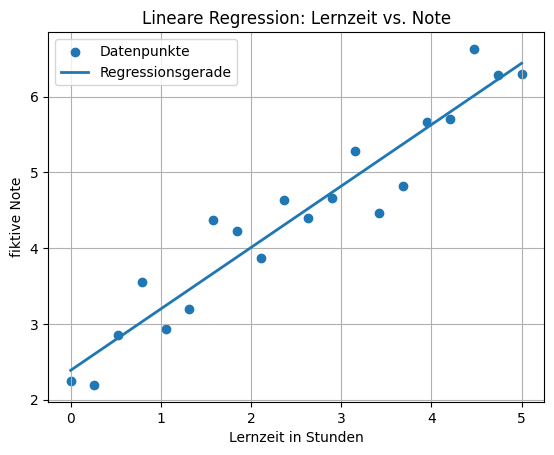

In [3]:
from sklearn.linear_model import LinearRegression

# scikit-learn erwartet X als 2D-Array der Form (Anzahl_Punkte, Anzahl_Features)
X_2d = X.reshape(-1, 1)

modell = LinearRegression()
modell.fit(X_2d, y)

m_schaetzung = modell.coef_[0]
b_schaetzung = modell.intercept_

print("Geschätzte Steigung m:", round(m_schaetzung, 3))
print("Geschätzter Achsenabschnitt b:", round(b_schaetzung, 3))

# Vorhersagen mit dem trainierten Modell
y_vorhersage = modell.predict(X_2d)

# Plot: Datenpunkte und Regressionsgerade
plt.scatter(X, y, label="Datenpunkte")
plt.plot(X, y_vorhersage, label="Regressionsgerade", linewidth=2)
plt.xlabel("Lernzeit in Stunden")
plt.ylabel("fiktive Note")
plt.title("Lineare Regression: Lernzeit vs. Note")
plt.grid(True)
plt.legend()
plt.show()

## 3. Interaktive Ansicht mit Schiebereglern


Jetzt kannst du selbst mit **Steigung** und **Achsenabschnitt** spielen und sehen:

- wie sich die Gerade verändert
- wie sich die **Fehler (Abstände)** zwischen Punkten und Gerade verändern

Die **vertikalen Linien** zeigen die Fehler an.  
Unten wird zusätzlich die **Summe der quadrierten Fehler** angezeigt – je kleiner, desto besser passt die Gerade.


In [4]:

def plot_line_with_errors(m=1.0, b=2.0):
    plt.figure(figsize=(6,4))
    plt.scatter(X, y, label="Datenpunkte")

    # Gerade berechnen
    y_line = m * X + b
    plt.plot(X, y_line, label=f"Gerade: y = {m:.2f} * x + {b:.2f}", linewidth=2)

    # Fehler (Residuen) als vertikale Linien einzeichnen
    squared_errors = []
    for xi, yi, y_hat in zip(X, y, y_line):
        plt.plot([xi, xi], [yi, y_hat], linestyle="--")  # Linie vom Punkt zur Gerade
        squared_errors.append((yi - y_hat)**2)

    sse = sum(squared_errors)  # Sum of Squared Errors

    plt.xlabel("Lernzeit in Stunden")
    plt.ylabel("fiktive Note")
    plt.title("Interaktive Gerade mit Fehler-Linien")
    plt.grid(True)
    plt.legend()
    plt.ylim(min(min(y), min(y_line)) - 1, max(max(y), max(y_line)) + 1)
    plt.show()

    print(f"Summe der quadrierten Fehler (SSE): {sse:.2f}")
    print("Je kleiner dieser Wert, desto besser passt die Gerade zu den Punkten.")

interact(plot_line_with_errors,
         m=widgets.FloatSlider(value=float(m_schaetzung), min=-1.0, max=3.0, step=0.1, description="Steigung m"),
         b=widgets.FloatSlider(value=float(b_schaetzung), min=0.0, max=4.0, step=0.1, description="Achsenabschnitt b"))

interactive(children=(FloatSlider(value=0.810826960992955, description='Steigung m', max=3.0, min=-1.0), Float…

<function __main__.plot_line_with_errors(m=1.0, b=2.0)>

## 4. Vorhersage machen

Wenn unser Modell einmal trainiert ist, können wir fragen:

> *„Welche Note würde das Modell für jemanden vorhersagen, der z. B. 3 Stunden lernt?“*

Das machen wir im folgenden Code-Block:


In [5]:
# Beispiel: Vorhersage für 3 Stunden Lernzeit
stunden = 3.0
note_vorhersage = modell.predict([[stunden]])[0]

print(f"Für {stunden} Stunden Lernzeit sagt das Modell eine Note von ca. {note_vorhersage:.2f} voraus.")

Für 3.0 Stunden Lernzeit sagt das Modell eine Note von ca. 4.82 voraus.


## 5️. Aufgaben

Beantworte die folgenden Fragen **schriftlich** in einem separaten Dokument:

1. **Beobachtung**  
   Schau dir den ersten Streudiagramm-Plot an.  
   a) Wie sieht der Zusammenhang zwischen Lernzeit und Note aus?  
   b) Ist er eher steigend, fallend oder zufällig?

2. **Steigung m**  
   a) Was passiert mit der Geraden, wenn du die Steigung **m** im interaktiven Plot grösser machst?  
   b) Was passiert, wenn du m negativ machst?  
   c) Überlege dir eine **Alltagssituation**, in der eine negative Steigung sinnvoll wäre.

3. **Achsenabschnitt b**  
   a) Was passiert mit der Geraden, wenn du **b** veränderst, ohne m zu ändern?  
   b) Wie würdest du b in unserem Beispiel „Lernzeit vs. Note“ interpretieren?

4. **Fehler / Residuen**  
   Beobachte die vertikalen Linien im interaktiven Plot.  
   a) Was bedeuten diese Linien?  
   b) Was passiert mit der **Summe der quadrierten Fehler (SSE)**, wenn du eine Gerade wählst, die schlecht passt?  
   c) Was passiert mit der SSE, wenn du die Schieberegler in Richtung der automatisch geschätzten Werte bewegst?

5. **Modellverständnis**  
   In unserem Modell ist die geschätzte Steigung ungefähr `m_schaetzung` und der Achsenabschnitt `b_schaetzung`.  
   a) Erkläre in einem Satz, was die geschätzte **Steigung m** inhaltlich bedeutet.  
   b) Erkläre, was der geschätzte **Achsenabschnitt b** bedeutet (auch wenn er vielleicht in der Realität nicht perfekt sinnvoll ist).

6. **Kritische Überlegung**  
   Nenne **zwei Gründe**, warum unser einfaches Modell in der Realität nicht perfekt sein wird.  
   (Stichworte: Messfehler, andere Einflüsse, …)

---

